In [1]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Importing Basic Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
mpl.style.use('ggplot')

# Data Acquisition

In [5]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [6]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Scaling

In [7]:
df2 = df.iloc[:,1:]

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()#instantiate
scaler.fit(df2)
df_scaled = scaler.transform(df2)
df_scaled

array([[ 1.75788035,  0.75744723, -0.69521045, ..., -1.81071884,
         0.13891975, -0.24102756],
       [ 1.75788035, -0.66165665, -0.61879381, ...,  0.83774863,
        -0.68965812, -0.23087859],
       [ 1.75788035, -0.66165665, -0.71219192, ...,  0.83774863,
        -0.68965812, -0.16301816],
       ...,
       [-1.61808342, -0.18862202, -0.2218518 , ..., -1.56994907,
        -0.08705603, -0.12861489],
       [-1.61808342, -2.08076053,  0.28759248, ...,  0.83774863,
        -0.68965812, -0.19742142],
       [-1.61808342, -0.18862202, -0.82681689, ..., -0.92789635,
         0.41511238, -0.18021979]])

# Clustering

## Partitioning Clustering - KMeans

### Finding the right number of clusters

In [8]:
cluster_range=range(1,10)
cluster_wss=[]

from sklearn.cluster import KMeans
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(df_scaled)
    cluster_wss.append(clusters.inertia_)    # store WSS of cluster

from collections import OrderedDict
clusters_df=pd.DataFrame(OrderedDict ({'num_clusters':cluster_range, 'cluster_wss': cluster_wss}))
clusters_df[0:9]

,num_clusters,cluster_wss
0,1,2.378640e+06
1,2,2.246678e+06
2,3,2.138806e+06
3,4,2.054696e+06
4,5,1.965334e+06
5,6,1.846463e+06
6,7,1.780698e+06
7,8,1.733196e+06
8,9,1.679675e+06


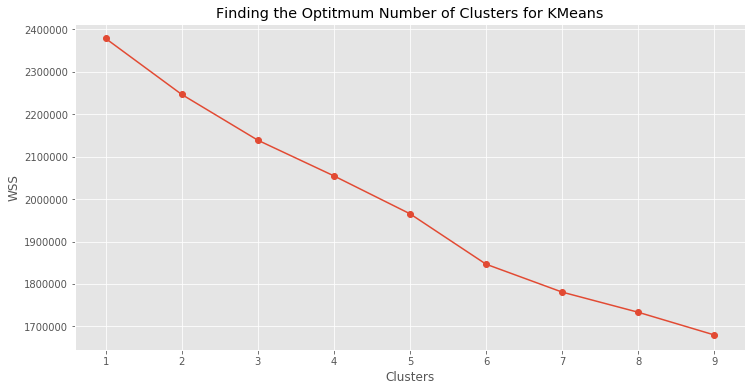

In [9]:
plt.figure(figsize=(12,6))
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.title('Finding the Optitmum Number of Clusters for KMeans')
plt.xticks(np.arange(min(clusters_df.num_clusters),max(clusters_df.num_clusters)+1, 1.0))  # on x-axis, tick marks after interval of 1
plt.plot(clusters_df.num_clusters, clusters_df.cluster_wss, marker="o")
plt.show()

### Building Cluster model

In [10]:
# kcluster=KMeans(n_clusters=5, random_state=0)
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=0)
k_means.fit(df_scaled)
labels = k_means.labels_
print(labels)

[1 1 1 ... 2 0 2]


### Adding CLuster Labels o the dataset

In [11]:
# Creating a scaled DataFrame
df_scaled_2 = pd.DataFrame(df_scaled, columns=df2.columns)
df_scaled_2.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.75788,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-1.164821,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.177459,-0.239676,-0.243926,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,1.200633,1.078827,-0.624921,-0.618276,-0.670541,0.670593,-0.275946,0.346403,-0.269079,0.457827,-0.366077,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920,-0.241028
1,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-1.688626,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,2.339253,-0.415144,-0.589153,-0.588335,-0.636381,-0.875228,0.305774,0.201534,-0.085507,0.269096,-0.136192,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658,-0.230879
2,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,-0.641015,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.156079,-0.229390,-0.226496,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,0.126224,-0.491211,-0.648502,-0.645137,1.549759,2.218418,2.104872,0.989601,-0.658817,0.920026,-0.929060,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658,-0.163018
3,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,-0.117210,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593319,1.265535,0.986490,-0.660140,-0.710484,-0.115874,-0.191940,0.103648,0.378984,-0.081405,0.290738,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658,-0.188821
4,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,0.159400,-0.117210,-0.236445,-0.465359,-0.432948,-0.249487,2.096826,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.174976,0.138221,-0.134259,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593092,-0.511879,-0.665431,-0.661269,2.252569,0.601046,1.668164,2.008329,-0.414241,0.936179,-0.948734,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056,-0.248596


In [12]:
df2.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [13]:
df_scaled_2["Clus_km"] = labels
df_scaled_2.head(5)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
0,1.75788,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-1.164821,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.177459,-0.239676,-0.243926,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,1.200633,1.078827,-0.624921,-0.618276,-0.670541,0.670593,-0.275946,0.346403,-0.269079,0.457827,-0.366077,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920,-0.241028,1
1,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-1.688626,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,2.339253,-0.415144,-0.589153,-0.588335,-0.636381,-0.875228,0.305774,0.201534,-0.085507,0.269096,-0.136192,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658,-0.230879,1
2,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,-0.641015,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.156079,-0.229390,-0.226496,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,0.126224,-0.491211,-0.648502,-0.645137,1.549759,2.218418,2.104872,0.989601,-0.658817,0.920026,-0.929060,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658,-0.163018,1
3,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,-0.117210,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593319,1.265535,0.986490,-0.660140,-0.710484,-0.115874,-0.191940,0.103648,0.378984,-0.081405,0.290738,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658,-0.188821,1
4,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,0.159400,-0.117210,-0.236445,-0.465359,-0.432948,-0.249487,2.096826,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.174976,0.138221,-0.134259,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593092,-0.511879,-0.665431,-0.661269,2.252569,0.601046,1.668164,2.008329,-0.414241,0.936179,-0.948734,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056,-0.248596,1


## Cluster Profiling

In [14]:
# df2[df2['Clus_km']==0]
# cluster 0 = lda 3 and lda 1
# cluster 1 = lda 2
# cluster 2 = lda 0
# cluster 3 = lda 4
# cluster 4 = lda in no category

# Multi-Class Classification

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import shapiro, mannwhitneyu

## Splitting the data

In [17]:
df_scaled_2.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
0,1.75788,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-1.164821,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.177459,-0.239676,-0.243926,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,1.200633,1.078827,-0.624921,-0.618276,-0.670541,0.670593,-0.275946,0.346403,-0.269079,0.457827,-0.366077,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920,-0.241028,1
1,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-1.688626,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,2.339253,-0.415144,-0.589153,-0.588335,-0.636381,-0.875228,0.305774,0.201534,-0.085507,0.269096,-0.136192,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658,-0.230879,1
2,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,-0.641015,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.156079,-0.229390,-0.226496,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,0.126224,-0.491211,-0.648502,-0.645137,1.549759,2.218418,2.104872,0.989601,-0.658817,0.920026,-0.929060,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658,-0.163018,1
3,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,-0.117210,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593319,1.265535,0.986490,-0.660140,-0.710484,-0.115874,-0.191940,0.103648,0.378984,-0.081405,0.290738,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658,-0.188821,1
4,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,0.159400,-0.117210,-0.236445,-0.465359,-0.432948,-0.249487,2.096826,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.174976,0.138221,-0.134259,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593092,-0.511879,-0.665431,-0.661269,2.252569,0.601046,1.668164,2.008329,-0.414241,0.936179,-0.948734,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056,-0.248596,1


In [18]:
y = df_scaled_2['Clus_km']
X = df_scaled_2.drop(['Clus_km'], axis=1)

## Checking for class Imbalance

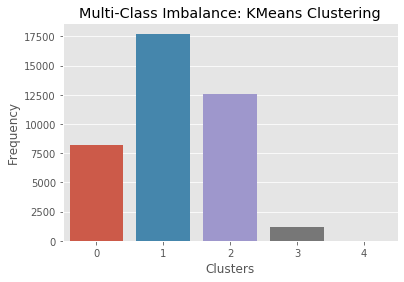

In [19]:
sns.countplot(data=df_scaled_2, x='Clus_km')
plt.ylabel('Frequency')
plt.xlabel('Clusters')
plt.title('Multi-Class Imbalance: KMeans Clustering')
plt.show()

In [20]:
df_scaled_2['Clus_km'].value_counts(normalize=True, ascending=False)*100

1    44.702855
2    31.611341
0    20.696701
3     2.986581
4     0.002522
Name: Clus_km, dtype: float64

In [21]:
# We see that class 4, is much lesser than the rest of the classes.

## Modelling

### Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (27750, 60)
Training y Shape: (27750,)
Testing X Shape: (11894, 60)
Testing y Shape: (11894,)


### Sampling 

In [24]:
# we will use sampling to balance the balance the target class labels

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
y_train.value_counts()

1    12380
2     8775
0     5736
3      859
Name: Clus_km, dtype: int64

In [27]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [28]:
np.bincount(y_train)

array([12380, 12380, 12380, 12380], dtype=int64)

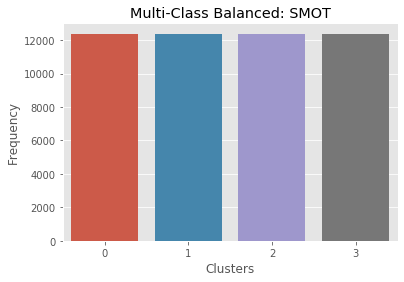

In [29]:
sns.countplot(data=df2, x=y_train)
plt.ylabel('Frequency')
plt.xlabel('Clusters')
plt.title('Multi-Class Balanced: SMOT')
plt.show()

In [30]:
y_train.value_counts(normalize=True, ascending=False)*100

3    25.0
2    25.0
1    25.0
0    25.0
Name: Clus_km, dtype: float64

### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}


#### Random Search Cross Validation

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

criterion = ['entropy','gini']
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,30)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(2,50)



# Create the random grid
random_grid = {'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

pprint(random_grid)

{'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 30),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(2, 50),
 'min_samples_split': [2, 5, 10]}


In [33]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator=dt, param_distributions=random_grid,
                              n_iter = 100, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
dt_random.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished


In [34]:
dt_random.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': None,
 'max_depth': 25,
 'criterion': 'gini'}

In [35]:
# cv results
cv_results_dt = pd.DataFrame(dt_random.cv_results_)
cv_results_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.237961,0.016504,0.010173,0.001717,10,48,auto,4,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.853630,0.847437,0.857441,0.861262,0.871572,0.858268,0.008068,62,0.858513,0.860083,0.857574,0.857341,0.859262,0.858555,0.001027
1,0.263094,0.024933,0.011571,0.004306,5,28,log2,22,gini,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.921095,0.905238,0.919042,0.936146,0.936919,0.923688,0.011823,53,0.939856,0.931073,0.932925,0.938136,0.930834,0.934565,0.003730
2,0.350062,0.042294,0.011170,0.001466,5,46,sqrt,21,gini,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.930303,0.927239,0.923623,0.943120,0.948306,0.934518,0.009524,43,0.947139,0.946293,0.935320,0.940836,0.936808,0.941279,0.004799
3,0.308175,0.024913,0.010373,0.001017,2,35,auto,25,gini,"{'min_samples_split': 2, 'min_samples_leaf': 3...",0.933688,0.937851,0.937164,0.939804,0.946239,0.938949,0.004146,30,0.949768,0.952788,0.946300,0.943101,0.940704,0.946532,0.004368
4,0.069014,0.011638,0.000000,0.000000,2,27,int,25,entropy,"{'min_samples_split': 2, 'min_samples_leaf': 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", dt_random.best_score_)
dt_random_best = dt_random.best_estimator_
print(dt_random.best_estimator_)

best accuracy 0.9610706237086724
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


#### Running the model with best parameters obtained from Random Search CV

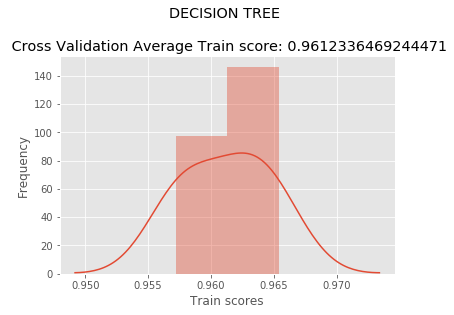

In [37]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_dt = cross_val_score(dt_random_best, X_train, y_train, cv=kfold, scoring='f1_weighted')
sns.distplot(cv_results_dt)
plt.xlabel('Train scores')
plt.ylabel('Frequency')
plt.title('DECISION TREE \n\n Cross Validation Average Train score: {}'.format(np.mean(cv_results_dt)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [38]:
from sklearn.model_selection import cross_val_predict

y_dt_pred_train = cross_val_predict(dt_random_best, X_train, y_train, cv=5)
y_dt_pred_test = cross_val_predict(dt_random_best, X_test, y_test, cv=5)

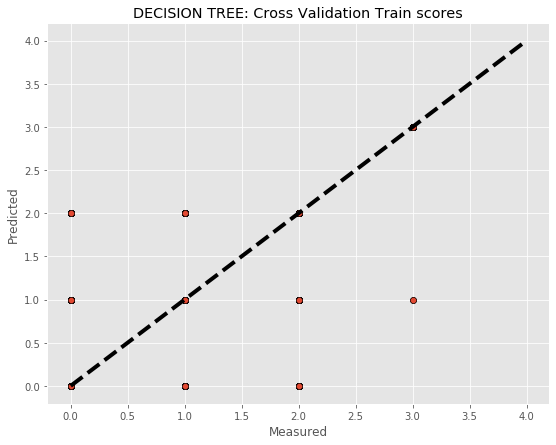

In [39]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('DECISION TREE: Cross Validation Train scores')
plt.show()

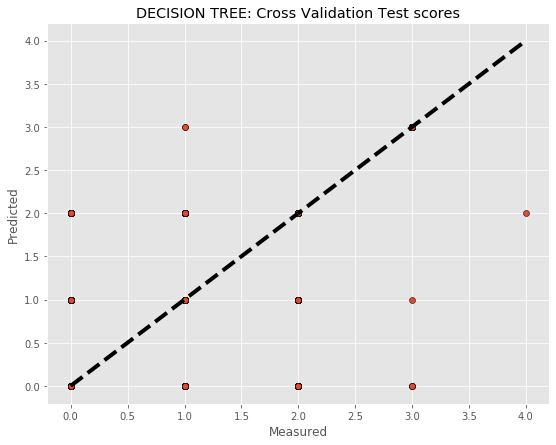

In [40]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [41]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
# y_dt_pred_train = dt_random_best.predict(X_train)
print(classification_report(y_train, y_dt_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12380
           1       0.93      0.93      0.93     12380
           2       0.94      0.94      0.94     12380
           3       1.00      1.00      1.00     12380

    accuracy                           0.96     49520
   macro avg       0.96      0.96      0.96     49520
weighted avg       0.96      0.96      0.96     49520



In [42]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
# y_dt_pred_test = dt_random_best.predict(X_test)
print(classification_report(y_test, y_dt_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2469
           1       0.92      0.93      0.93      5342
           2       0.90      0.90      0.90      3757
           3       0.99      0.98      0.99       325
           4       0.00      0.00      0.00         1

    accuracy                           0.93     11894
   macro avg       0.76      0.75      0.76     11894
weighted avg       0.93      0.93      0.93     11894



##### Confusion Matrix

In [43]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_dt_pred_train))

[[12124   151   105     0]
 [  202 11494   684     0]
 [  108   673 11599     0]
 [    0     3     0 12377]]


In [44]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_dt_pred_test))

[[2377   62   30    0    0]
 [  55 4951  334    2    0]
 [  41  341 3375    0    0]
 [   4    1    0  320    0]
 [   0    0    1    0    0]]


##### Cohen Kappa score

In [45]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_dt_pred_train)

0.9481421647819063

In [46]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_dt_pred_test)

0.88811152150298

### Random Forest

In [47]:
rf = RandomForestClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### Random Search Cross Validation

In [48]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = range(1,50)

# splitting criterion
criterion = ['entropy','gini']

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50),
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': range(1, 50)}


In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  9.0min finished


In [50]:
rf_random.best_params_

{'n_estimators': 32,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

In [51]:
# cv results
cv_results_rf = pd.DataFrame(rf_random.cv_results_)
cv_results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.099135,0.014098,0.000000,0.000000,19,20,26,int,18,entropy,False,"{'n_estimators': 19, 'min_samples_split': 20, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32.328883,1.453890,0.027526,0.008934,7,15,30,None,32,gini,False,"{'n_estimators': 7, 'min_samples_split': 15, '...",0.953811,0.950705,0.957388,0.963423,0.967631,0.958592,0.00619,25,0.967861,0.969026,0.965463,0.96688,0.965518,0.96695,0.001372
2,0.111102,0.009515,0.000000,0.000000,49,15,32,int,21,entropy,True,"{'n_estimators': 49, 'min_samples_split': 15, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.065227,0.004443,0.000000,0.000000,11,5,26,float,31,entropy,True,"{'n_estimators': 11, 'min_samples_split': 5, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.065026,0.005930,0.000000,0.000000,9,20,31,int,23,gini,True,"{'n_estimators': 9, 'min_samples_split': 20, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rf_random.best_score_)
rf_random_best = rf_random.best_estimator_
print(rf_random_best)

best accuracy 0.9767501937528207
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#### Running the model with best parameters obtained from Random Search CV

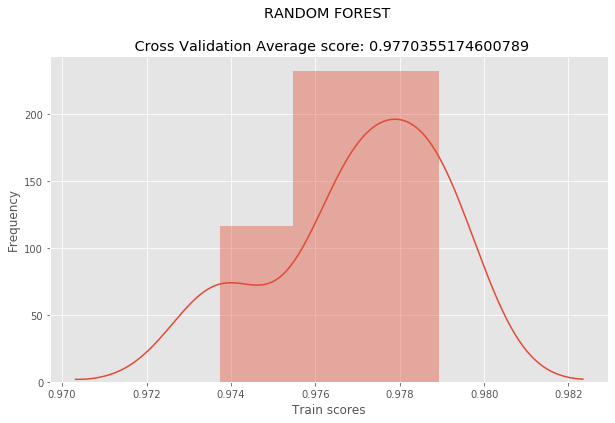

In [53]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_rf = cross_val_score(rf_random_best, X_train, y_train, cv=kfold, scoring='f1_weighted')
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_rf)
plt.title('RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_rf)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [54]:
from sklearn.model_selection import cross_val_predict

y_rf_pred_train = cross_val_predict(rf_random_best, X_train, y_train, cv=5)
y_rf_pred_test = cross_val_predict(rf_random_best, X_test, y_test, cv=5)

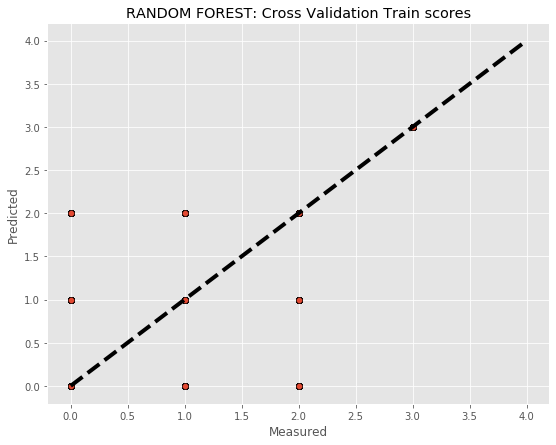

In [55]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Train scores')
plt.show()

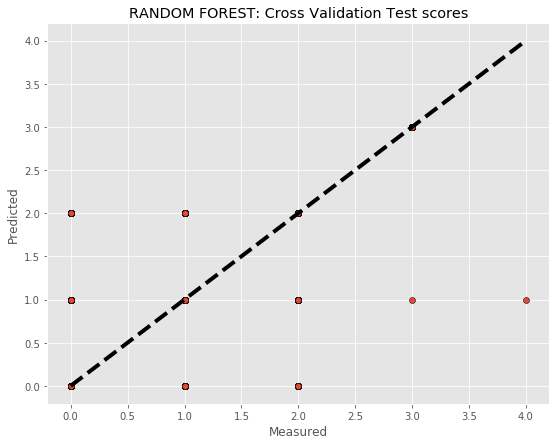

In [56]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [57]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_train = rf_random_best.predict(X_train)
print(classification_report(y_train, y_rf_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     12380
           1       0.96      0.96      0.96     12380
           2       0.96      0.96      0.96     12380
           3       1.00      1.00      1.00     12380

    accuracy                           0.98     49520
   macro avg       0.98      0.98      0.98     49520
weighted avg       0.98      0.98      0.98     49520



In [58]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_test = rf_random_best.predict(X_test)
print(classification_report(y_test, y_rf_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2469
           1       0.95      0.97      0.96      5342
           2       0.95      0.94      0.94      3757
           3       1.00      1.00      1.00       325
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.78      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Confusion Matrix

In [59]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_rf_pred_train))

[[12191   118    71     0]
 [  102 11909   369     0]
 [   49   443 11888     0]
 [    0     0     0 12380]]


In [60]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_rf_pred_test))

[[2369   71   29    0    0]
 [  29 5162  151    0    0]
 [  16  224 3517    0    0]
 [   0    1    0  324    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [61]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_rf_pred_train)

0.9689822294022618

In [62]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_rf_pred_test)

0.932770362300281

### Decision Tree: Bagging

In [63]:
from sklearn.ensemble import BaggingClassifier

# taking the base model as a Decision Tree
bg_dt = BaggingClassifier(base_estimator=dt_random_best, n_estimators=50, random_state=0, oob_score=True)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_bg_dt = cross_val_score(bg_dt, X_train, y_train, cv=kfold, scoring='f1_weighted')

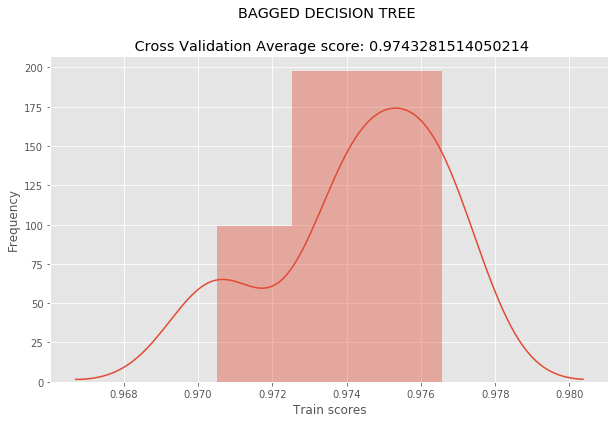

In [64]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_bg_dt)
plt.title('BAGGED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_bg_dt)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [65]:
from sklearn.model_selection import cross_val_predict

y_bg_dt_pred_train = cross_val_predict(bg_dt, X_train, y_train, cv=5)
y_bg_dt_pred_test = cross_val_predict(bg_dt, X_test, y_test, cv=5)

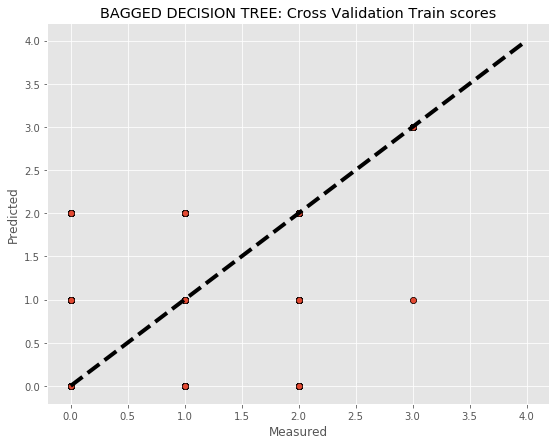

In [66]:
# Decision Tree Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_bg_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED DECISION TREE: Cross Validation Train scores')
plt.show()

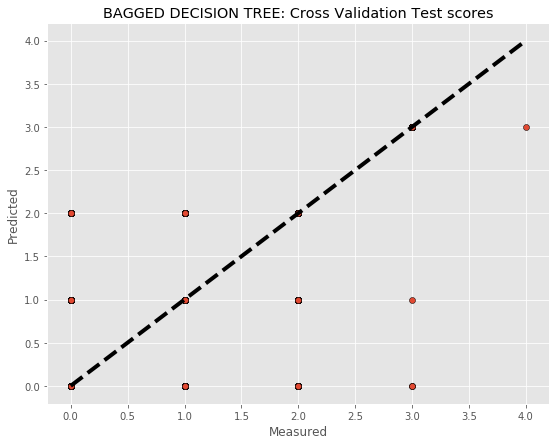

In [67]:
# Decision Tree Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_bg_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [68]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_bg_dt_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12380
           1       0.96      0.95      0.95     12380
           2       0.96      0.96      0.96     12380
           3       1.00      1.00      1.00     12380

    accuracy                           0.97     49520
   macro avg       0.97      0.97      0.97     49520
weighted avg       0.97      0.97      0.97     49520



In [69]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_bg_dt_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2469
           1       0.95      0.96      0.96      5342
           2       0.94      0.94      0.94      3757
           3       1.00      0.99      0.99       325
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.77      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Classification Matrix

In [70]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_bg_dt_pred_train))

[[12176   115    89     0]
 [  147 11764   469     0]
 [   62   412 11906     0]
 [    0     3     0 12377]]


In [71]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_bg_dt_pred_test))

[[2396   48   25    0    0]
 [  38 5116  188    0    0]
 [  22  202 3533    0    0]
 [   3    1    0  321    0]
 [   0    0    0    1    0]]


##### Cohen Kappa score

In [72]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_bg_dt_pred_train)

0.9650780829294561

In [73]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_bg_dt_pred_test)

0.9321422991642989

### Random Forest: Bagging

In [74]:
from sklearn.ensemble import BaggingClassifier

# taking the base model as a Decision Tree
bg_rf = BaggingClassifier(base_estimator=rf_random_best, n_estimators=50, random_state=0, oob_score=True)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_bg_rf = cross_val_score(bg_rf, X_train, y_train, cv=kfold, scoring='f1_weighted')

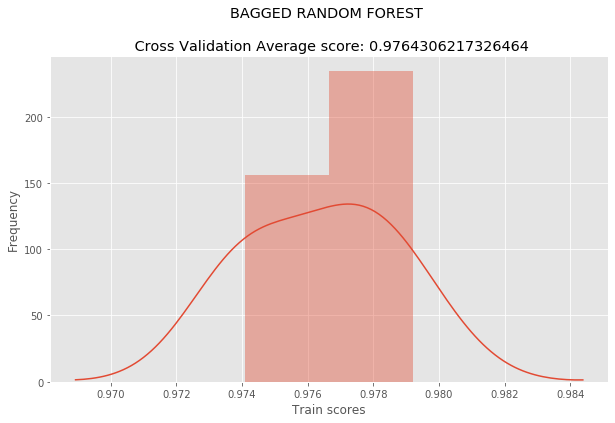

In [75]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_bg_rf)
plt.title('BAGGED RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_bg_rf)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [76]:
from sklearn.model_selection import cross_val_predict

y_bg_rf_pred_train = cross_val_predict(bg_rf, X_train, y_train, cv=5)
y_bg_rf_pred_test = cross_val_predict(bg_rf, X_test, y_test, cv=5)

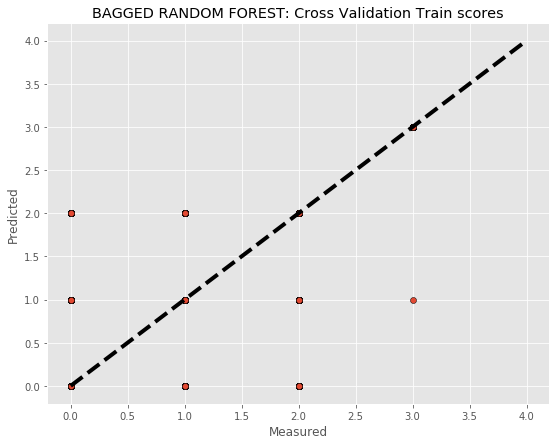

In [77]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_bg_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED RANDOM FOREST: Cross Validation Train scores')
plt.show()

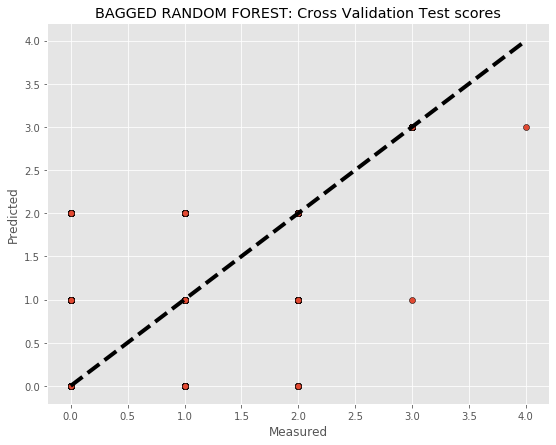

In [78]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_bg_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [79]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_bg_rf_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     12380
           1       0.96      0.96      0.96     12380
           2       0.96      0.96      0.96     12380
           3       1.00      1.00      1.00     12380

    accuracy                           0.98     49520
   macro avg       0.98      0.98      0.98     49520
weighted avg       0.98      0.98      0.98     49520



In [80]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_bg_rf_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2469
           1       0.94      0.97      0.96      5342
           2       0.96      0.94      0.95      3757
           3       1.00      1.00      1.00       325
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.78      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Classification Matrix

In [81]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_bg_rf_pred_train))

[[12176   120    84     0]
 [  102 11902   376     0]
 [   53   431 11896     0]
 [    0     1     0 12379]]


In [82]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_bg_rf_pred_test))

[[2360   83   26    0    0]
 [  29 5177  136    0    0]
 [  12  218 3527    0    0]
 [   0    1    0  324    0]
 [   0    0    0    1    0]]


##### Cohen Kappa score

In [83]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_bg_rf_pred_train)

0.968578352180937

In [84]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_bg_rf_pred_test)

0.9347992616360056

### Decison Tree: Boosting

#### Ada Boost:

In [85]:
from sklearn.ensemble import AdaBoostClassifier
ab_dt = AdaBoostClassifier(base_estimator=dt_random_best, n_estimators= 50, random_state=0)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_ab_dt = cross_val_score(ab_dt, X_train, y_train, cv=kfold, scoring='f1_weighted')


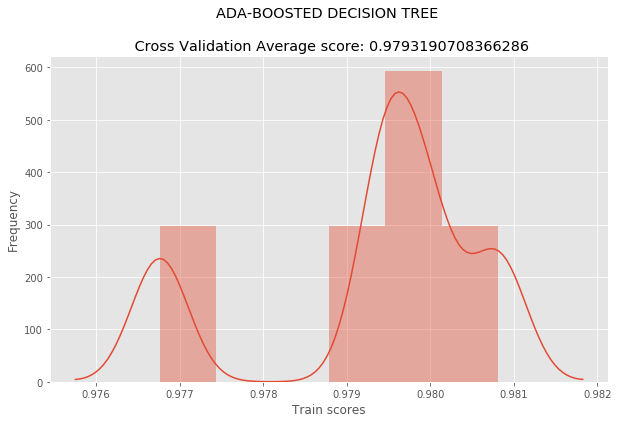

In [86]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_ab_dt)
plt.title('ADA-BOOSTED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_ab_dt)))
plt.show()

##### Evaluation Metrics

##### Plotting Cross Val score results

In [87]:
from sklearn.model_selection import cross_val_predict

y_ab_dt_pred_train = cross_val_predict(ab_dt, X_train, y_train, cv=5)
y_ab_dt_pred_test = cross_val_predict(ab_dt, X_test, y_test, cv=5)

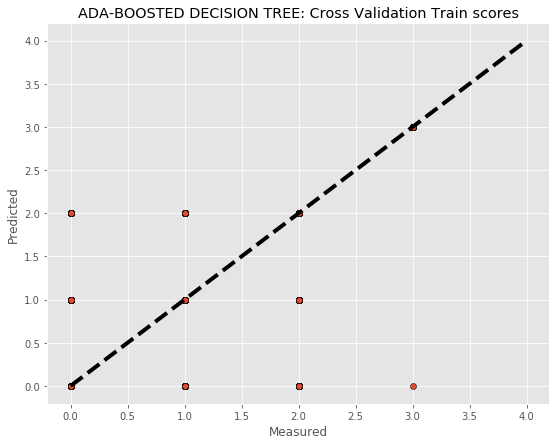

In [88]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_ab_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED DECISION TREE: Cross Validation Train scores')
plt.show()

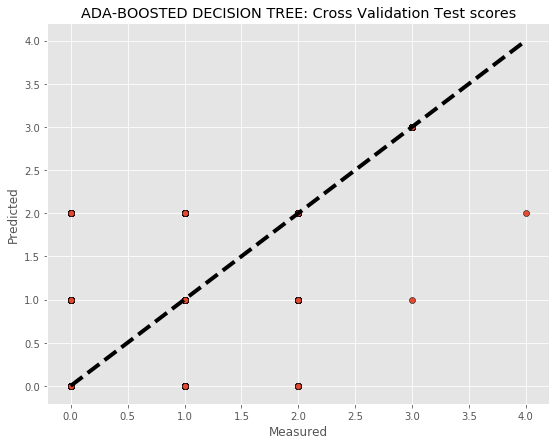

In [89]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_ab_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [90]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_ab_dt_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12380
           1       0.96      0.96      0.96     12380
           2       0.97      0.97      0.97     12380
           3       1.00      1.00      1.00     12380

    accuracy                           0.98     49520
   macro avg       0.98      0.98      0.98     49520
weighted avg       0.98      0.98      0.98     49520



In [91]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_ab_dt_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2469
           1       0.95      0.96      0.95      5342
           2       0.95      0.94      0.94      3757
           3       1.00      1.00      1.00       325
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.78      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Classification Matrix

In [92]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_ab_dt_pred_train))

[[12253    83    44     0]
 [  114 11887   379     0]
 [   53   355 11972     0]
 [    1     0     0 12379]]


In [93]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_ab_dt_pred_test))

[[2373   75   21    0    0]
 [  34 5141  167    0    0]
 [  13  214 3530    0    0]
 [   0    1    0  324    0]
 [   0    0    1    0    0]]


##### Cohen Kappa score

In [94]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_ab_dt_pred_train)

0.9722940226171244

In [95]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_ab_dt_pred_test)

0.9322933956893765

#### Gradient Boost

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gb_dt = GradientBoostingClassifier(n_estimators= 50, random_state=0)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_gb_dt = cross_val_score(gb_dt, X_train, y_train, cv=kfold, scoring='f1_weighted')


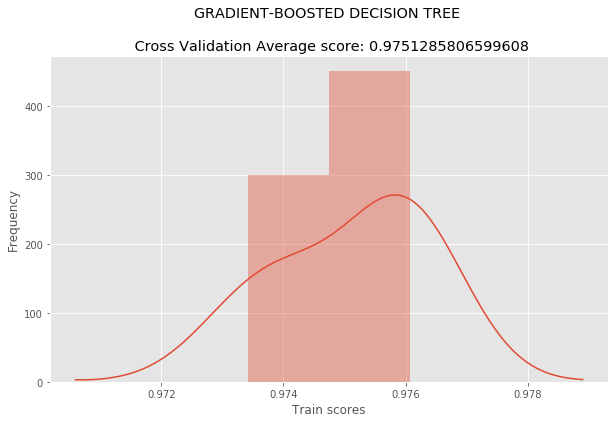

In [97]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_gb_dt)
plt.title('GRADIENT-BOOSTED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_gb_dt)))
plt.show()

##### Evaluation Metrics

##### Plotting Cross Val score results

In [98]:
from sklearn.model_selection import cross_val_predict

y_gb_dt_pred_train = cross_val_predict(gb_dt, X_train, y_train, cv=5)
y_gb_dt_pred_test = cross_val_predict(gb_dt, X_test, y_test, cv=5)

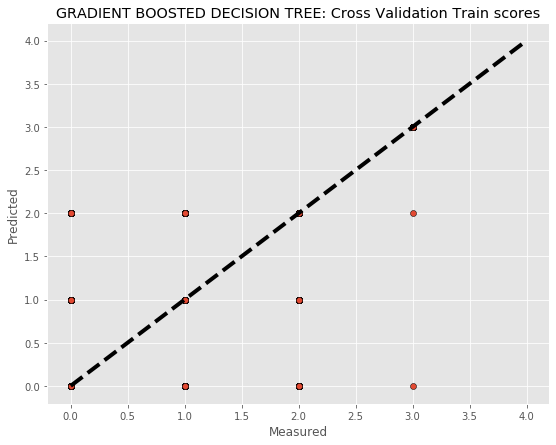

In [99]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_gb_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('GRADIENT BOOSTED DECISION TREE: Cross Validation Train scores')
plt.show()

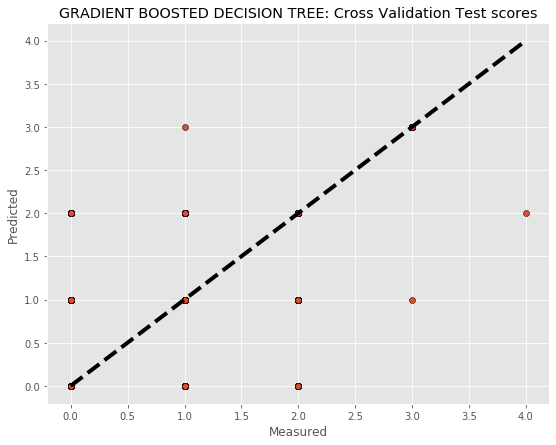

In [100]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_gb_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('GRADIENT BOOSTED DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [101]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_gb_dt_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     12380
           1       0.96      0.96      0.96     12380
           2       0.96      0.96      0.96     12380
           3       1.00      1.00      1.00     12380

    accuracy                           0.97     49520
   macro avg       0.97      0.97      0.97     49520
weighted avg       0.97      0.97      0.97     49520



In [102]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_gb_dt_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2469
           1       0.96      0.96      0.96      5342
           2       0.95      0.95      0.95      3757
           3       1.00      1.00      1.00       325
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.78      0.78      0.78     11894
weighted avg       0.96      0.96      0.96     11894



##### Classification Matrix

In [103]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_gb_dt_pred_train))

[[12197   111    72     0]
 [  139 11841   400     0]
 [   83   433 11864     0]
 [    1     0     1 12378]]


In [104]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_gb_dt_pred_test))

[[2394   53   22    0    0]
 [  38 5155  148    1    0]
 [  16  187 3554    0    0]
 [   0    1    0  324    0]
 [   0    0    1    0    0]]


##### Cohen Kappa score

In [105]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_gb_dt_pred_train)

0.96661281637049

In [106]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_gb_dt_pred_test)

0.9399495824967409

#### XG Boost

In [107]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

xgb_dt = xgb.XGBClassifier(random_state = 0)
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

xgb_random = RandomizedSearchCV(xgb_dt,
                    parameters, n_jobs=-1,
                    scoring="f1_weighted",
                    cv=5, n_iter = 15,verbose=2, random_state=0,
                    return_train_score=True)

xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 20.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=15, n_

In [108]:
xgb_random.best_params_

{'min_child_weight': 1,
 'max_depth': 4,
 'gamma': 0.2,
 'eta': 0.3,
 'colsample_bytree': 0.4}

In [109]:
# cv results
cv_results_xgb = pd.DataFrame(xgb_random.cv_results_)
cv_results_xgb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_gamma,param_eta,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,139.472986,2.742162,0.577567,0.011373,1,6,0,0.3,0.5,"{'min_child_weight': 1, 'max_depth': 6, 'gamma...",0.983853,0.984464,0.984333,0.988569,0.992610,0.986766,0.003379,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,131.026857,1.927154,0.549626,0.033666,7,6,0.1,0.25,0.5,"{'min_child_weight': 7, 'max_depth': 6, 'gamma...",0.984966,0.985367,0.985752,0.988570,0.993321,0.987595,0.003131,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,152.512239,1.712872,0.658385,0.031555,3,10,0.1,0.25,0.4,"{'min_child_weight': 3, 'max_depth': 10, 'gamm...",0.983149,0.983457,0.985654,0.988469,0.993625,0.986871,0.003877,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,116.593318,1.346801,0.332578,0.012219,1,3,0.2,0.15,0.7,"{'min_child_weight': 1, 'max_depth': 3, 'gamma...",0.980611,0.981834,0.981090,0.985119,0.990382,0.983807,0.003645,13,0.992528,0.992249,0.991844,0.991617,0.990354,0.991718,0.000751
4,64.892788,1.229433,0.327616,0.016668,7,3,0.1,0.3,0.3,"{'min_child_weight': 7, 'max_depth': 3, 'gamma...",0.983653,0.983559,0.985757,0.988264,0.991907,0.986628,0.003149,9,0.996694,0.996996,0.996920,0.996794,0.995961,0.996673,0.000371


In [110]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", xgb_random.best_score_)
xgb_random_best = xgb_random.best_estimator_
print(xgb_random_best)

best accuracy 0.9879984696097818
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.3, gamma=0.2,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


In [111]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_xgb = cross_val_score(xgb_random_best, X_train, y_train, cv=kfold, scoring='f1_weighted')

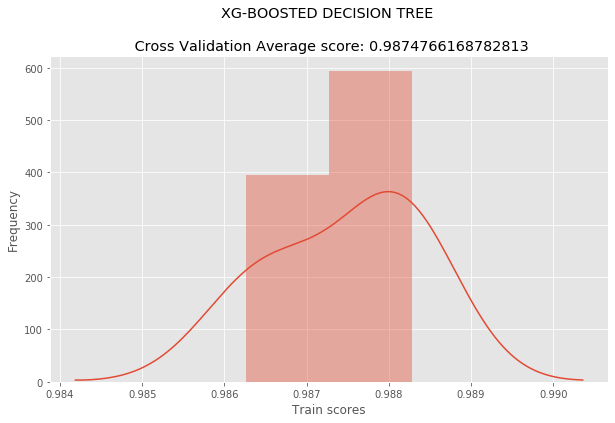

In [112]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_xgb)
plt.title('XG-BOOSTED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_xgb)))
plt.show()

##### Evaluation Metrics

##### Plotting Cross Val score results

In [113]:
from sklearn.model_selection import cross_val_predict

y_xgb_dt_pred_train = cross_val_predict(xgb_random_best, X_train, y_train, cv=5)
y_xgb_dt_pred_test = cross_val_predict(xgb_random_best, X_test, y_test, cv=5)

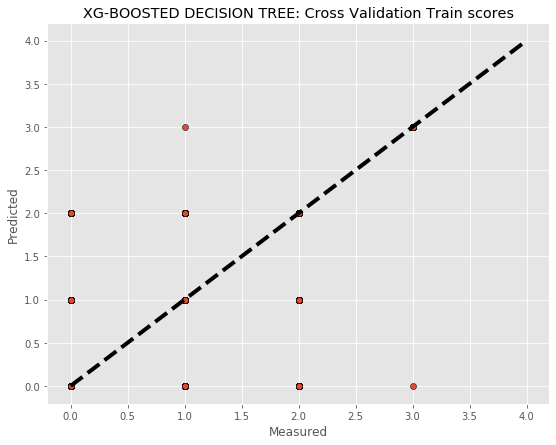

In [114]:
# Random Forest xg-boosted Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_xgb_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('XG-BOOSTED DECISION TREE: Cross Validation Train scores')
plt.show()

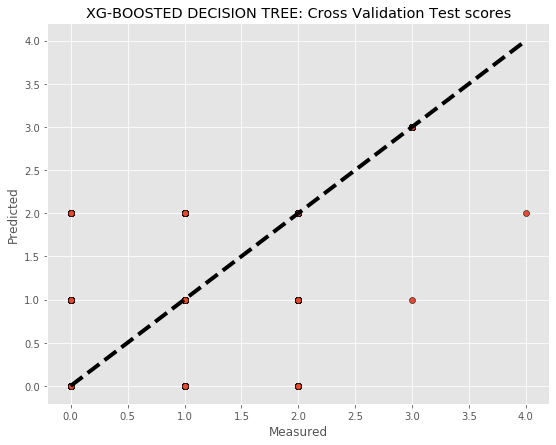

In [115]:
# Random Forest xg-boosted Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_xgb_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('XG-BOOSTED DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [116]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_xgb_dt_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12380
           1       0.98      0.98      0.98     12380
           2       0.98      0.98      0.98     12380
           3       1.00      1.00      1.00     12380

    accuracy                           0.99     49520
   macro avg       0.99      0.99      0.99     49520
weighted avg       0.99      0.99      0.99     49520



In [117]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_xgb_dt_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2469
           1       0.97      0.98      0.98      5342
           2       0.97      0.97      0.97      3757
           3       1.00      1.00      1.00       325
           4       0.00      0.00      0.00         1

    accuracy                           0.97     11894
   macro avg       0.79      0.78      0.78     11894
weighted avg       0.97      0.97      0.97     11894



##### Classification Matrix

In [118]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_xgb_dt_pred_train))

[[12303    47    30     0]
 [   63 12097   219     1]
 [   41   192 12147     0]
 [    1     0     0 12379]]


In [119]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_xgb_dt_pred_test))

[[2413   38   18    0    0]
 [  23 5225   94    0    0]
 [  17  108 3632    0    0]
 [   0    1    0  324    0]
 [   0    0    1    0    0]]


##### Cohen Kappa score

In [120]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_xgb_dt_pred_train)

0.9840064620355412

In [121]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_xgb_dt_pred_test)

0.9614408262785059

### Random Forest: Boosting

#### Ada Boost

In [122]:
from sklearn.ensemble import AdaBoostClassifier
ab_rf = AdaBoostClassifier(base_estimator=rf_random_best, n_estimators= 50, random_state=0)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_ab_rf = cross_val_score(ab_rf, X, y, cv=kfold, scoring='f1_weighted')


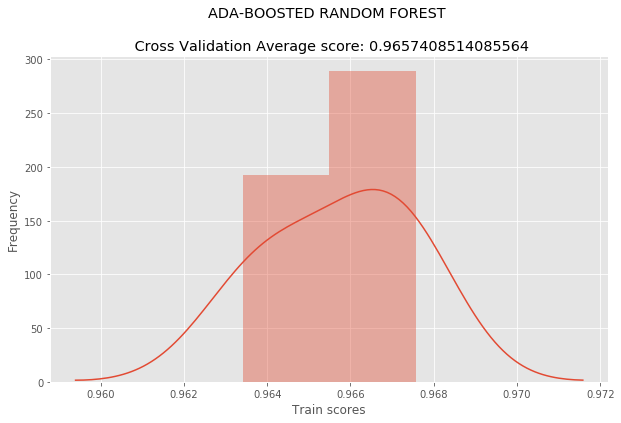

In [123]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_ab_rf)
plt.title('ADA-BOOSTED RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_ab_rf)))
plt.show()

##### Evaluation Metrics

##### Plotting Cross Val score results

In [124]:
from sklearn.model_selection import cross_val_predict

y_ab_rf_pred_train = cross_val_predict(ab_rf, X_train, y_train, cv=5)
y_ab_rf_pred_test = cross_val_predict(ab_rf, X_test, y_test, cv=5)

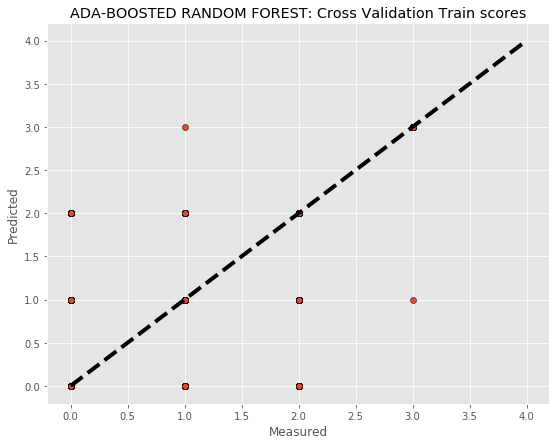

In [125]:
# Random Forest Ada-Boosting Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_ab_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED RANDOM FOREST: Cross Validation Train scores')
plt.show()

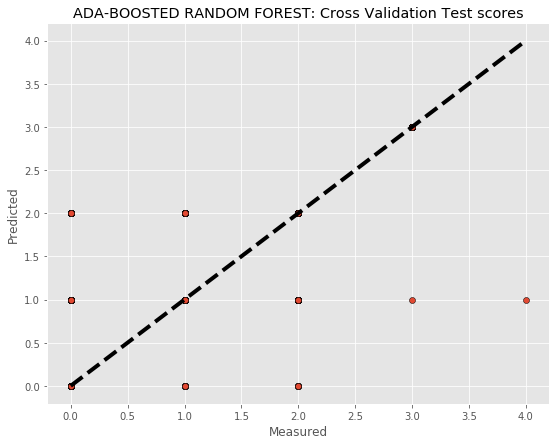

In [126]:
# Random Forest Ada-Boosting Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_ab_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [127]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_ab_rf_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12380
           1       0.96      0.98      0.97     12380
           2       0.98      0.96      0.97     12380
           3       1.00      1.00      1.00     12380

    accuracy                           0.98     49520
   macro avg       0.98      0.98      0.98     49520
weighted avg       0.98      0.98      0.98     49520



In [128]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_ab_rf_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2469
           1       0.95      0.98      0.97      5342
           2       0.97      0.95      0.96      3757
           3       1.00      1.00      1.00       325
           4       0.00      0.00      0.00         1

    accuracy                           0.97     11894
   macro avg       0.78      0.78      0.78     11894
weighted avg       0.97      0.97      0.97     11894



##### Classification Matrix

In [129]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_ab_rf_pred_train))

[[12265    74    41     0]
 [   62 12122   195     1]
 [   38   448 11894     0]
 [    0     1     0 12379]]


In [130]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_ab_rf_pred_test))

[[2362   82   25    0    0]
 [  13 5236   93    0    0]
 [  10  178 3569    0    0]
 [   0    1    0  324    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [131]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_ab_rf_pred_train)

0.9768443726440496

In [132]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_ab_rf_pred_test)

0.9480408645127257